<a href="https://colab.research.google.com/github/kishan1104/ML-Projects/blob/main/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
btc = yf.download(['BTC-USD'],start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2020, 12, 2))['Close']

[*********************100%%**********************]  1 of 1 completed


In [ ]:
btc.to_csv("btc.csv")
btc = pd.read_csv("btc.csv")

btc.index = pd.to_datetime(btc['Date'], format='%Y-%m-%d')
del btc['Date']
print(btc.head())

                   Close
Date                    
2018-01-01  13657.200195
2018-01-02  14982.099609
2018-01-03  15201.000000
2018-01-04  15599.200195
2018-01-05  17429.500000


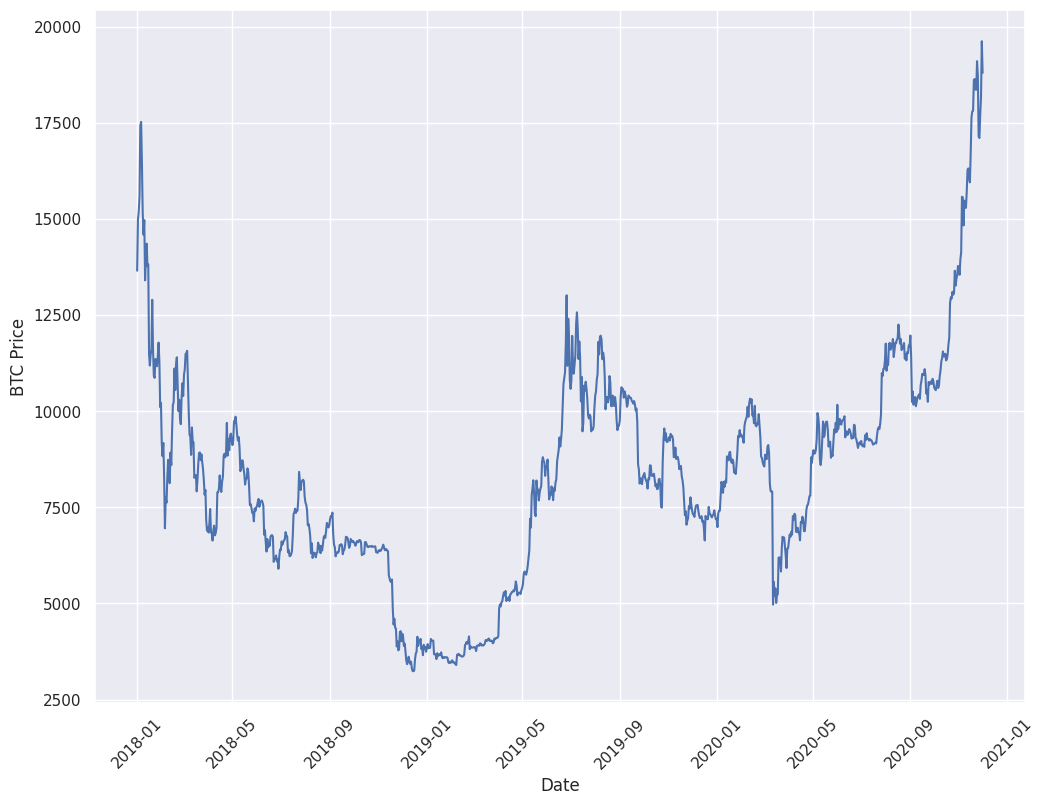

In [ ]:
sns.set()
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(btc.index, btc['Close'], )

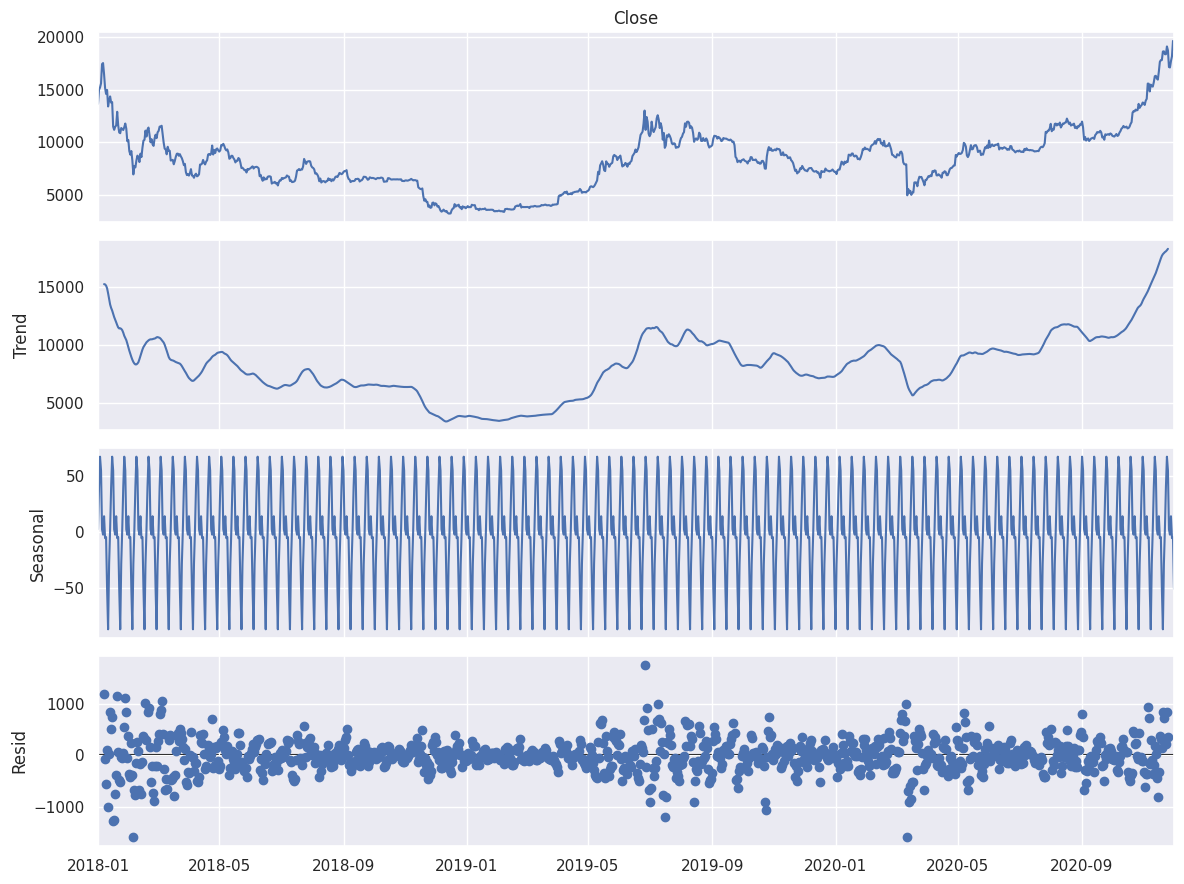

In [ ]:

plt.rcParams.update({'figure.figsize':(12,9)})
decompose = seasonal_decompose(btc['Close'],model='additive', period=12)
decompose.plot()
plt.show()

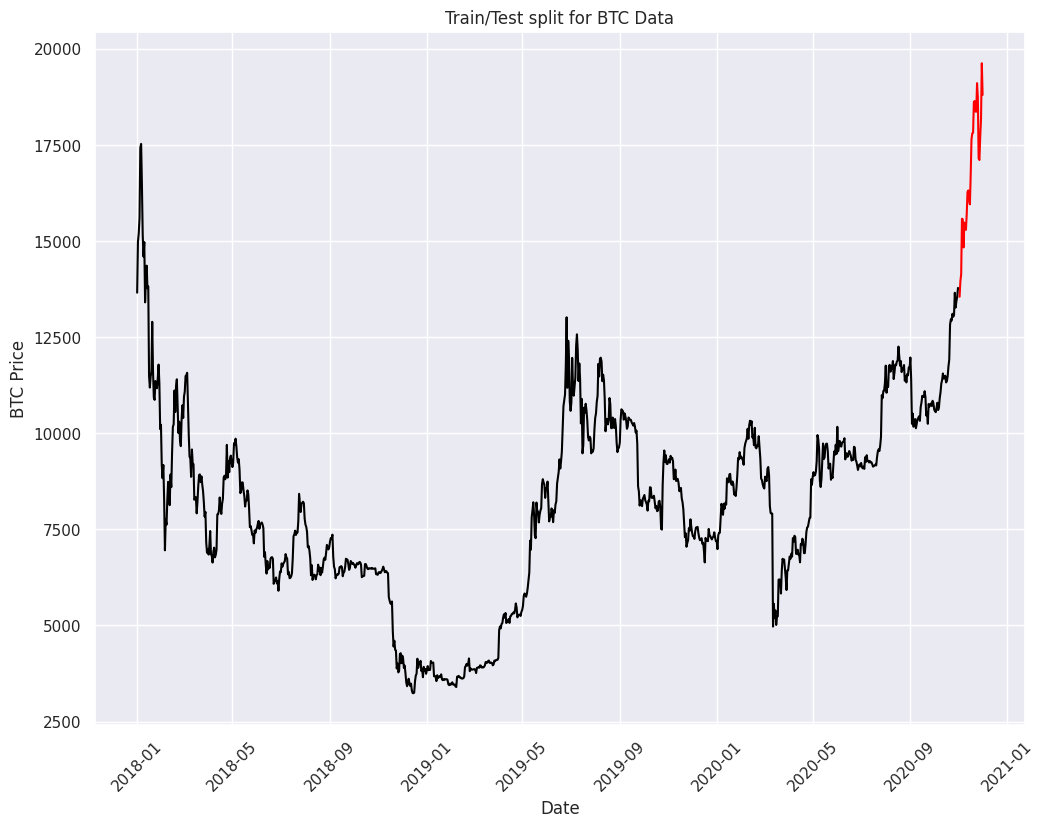

In [ ]:
train = btc[btc.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test = btc[btc.index > pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
y = train['Close']

In [ ]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

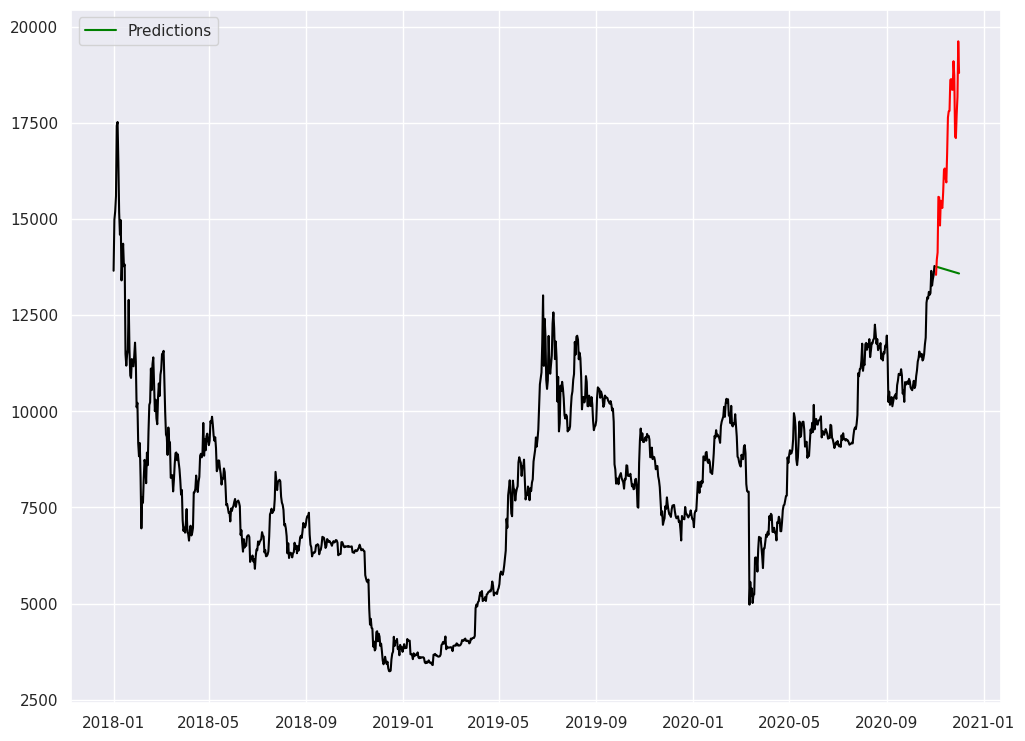

In [ ]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.legend()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error



In [ ]:
arma_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  3562.1356482324695


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

RMSE:  906.7823287606747


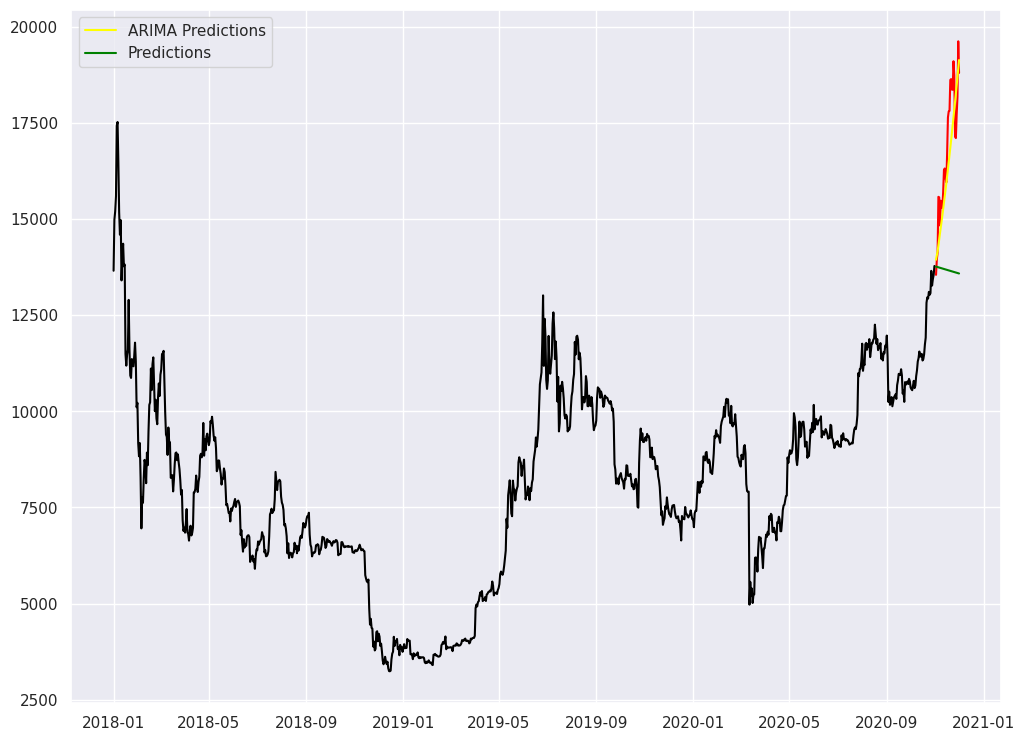

In [ ]:
ARIMAmodel = ARIMA(y, order = (5, 4, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred1 = ARIMAmodel.get_forecast(len(test.index))
y_pred_df1 = y_pred.conf_int(alpha = 0.05)
y_pred_df1["Predictions"] = ARIMAmodel.predict(start = y_pred_df1.index[0], end = y_pred_df1.index[-1])
y_pred_df1.index = test.index
y_pred_out1 = y_pred_df1["Predictions"]
plt.plot(test, color = "red")
plt.plot(y_pred_out1, color='Yellow', label = 'ARIMA Predictions')
plt.plot(train, color = "black")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df1["Predictions"]))
print("RMSE: ",arma_rmse)